In [14]:
import networkx as nx
import matplotlib.pyplot as plt

Пункт a

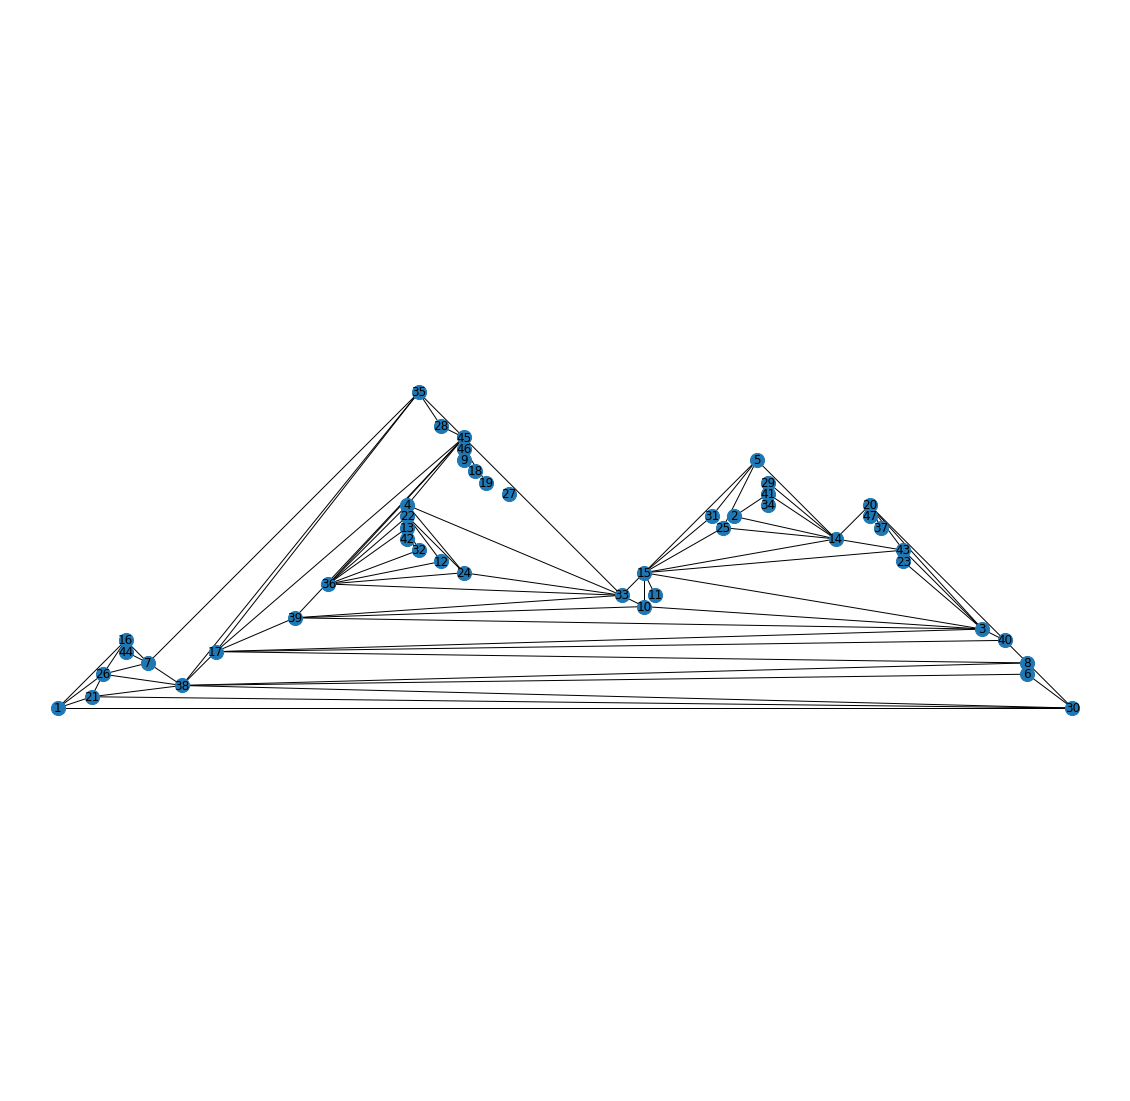

In [31]:
G = nx.Graph()
def add_edgeNO(f_item, s_item, graph=None):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item) 
for i in range(1, 48):
    G.add_node(str(i))
fin = open("Country edges.txt", "r")
for i in range(88):
    a, b = map(str, fin.readline().split())
    add_edgeNO(a, b, G)
pos = nx.planar_layout(G)
plt.figure(figsize=(20,20))
plt.axis('equal')
nx.draw(G,pos, with_labels=True, node_size=200)
plt.show()

Пункт b

In [35]:
G_component = G.subgraph(max(nx.connected_components(G), key=len))